In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get_dataset_df(weekNumber, datasetFileName)
data_all_cats = utils.get_dataset_df(3, "all_categories")
data_cats_description = utils.get_dataset_df(3, "category_description")
data_countries_description = utils.get_dataset_df(3, "country_description")
data_updated_income = utils.get_dataset_df(3, "updated_income")
# data_all_cats
# data_cats_description
# data_countries_description
# data_updated_income

In [3]:
# first clean the column which contains repated information or useless information
data_clean = data_all_cats.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Classification', 'Trade Flow Code', 'Reporter Code', \
 'Reporter', 'Partner Code', 'Partner', 'Qty Unit Code', 'Category Code', 'Development Category'])

data_clean = data_clean.loc[data_clean['Year'] >= 2007]
data_clean['Year'] = data_clean['Year'].astype(str)

Now see some descriptions of the cleaned dataset

In [4]:
# Now see some general desctiption of the cleaned dataset
print(f"Cleaned dataset has columns: \n {data_clean.columns} \n")
print(f"Cleaned dataset has shape： {data_clean.shape} \n")
print(f"The records are from {len(data_clean['Year'].unique())} different years: {data_clean['Year'].unique()} \n")
print(f"There are {len(data_clean['Trade Flow'].unique())} kinds of trade flows: {data_clean['Trade Flow'].unique()} \n")
print(f"There are totally {len(data_clean['Reporter ISO'].unique())} reporters: {data_clean['Reporter ISO'].unique()} \n")
print(f"There are totally {len(data_clean['Partner ISO'].unique())} partners\n")
print(f"There are totally {len(data_clean['Commodity Code'].unique())} kinds of commodity codes")
print(f"There are totally {len(data_clean['Commodity'].unique())} kinds of commodities")
print(f"There are totally {len(data_clean['Category'].unique())} kinds of categories: {data_clean['Category'].unique()}")

Cleaned dataset has columns: 
 Index(['Year', 'Trade Flow', 'Reporter ISO', 'Partner ISO', 'Commodity Code',
       'Commodity', 'Qty Unit', 'Qty', 'Netweight (kg)', 'Trade Value (US$)',
       'Category', 'Development Level', 'Population in 2005 (in million)',
       'Population in 2010 (in million)', 'Population in 2014 (in million)',
       'Population in 2018 (in million)',
       '% Malnutritioned Childern < 5 years old', 'Total Imports in $',
       'Income Index Rank', 'ii2005', 'ii2006', 'ii2007', 'ii2008', 'ii2009',
       'ii2010', 'ii2011', 'ii2012', 'ii2013', 'ii2014', 'ii2015', 'ii2016',
       'ii2017', 'ii2018'],
      dtype='object') 

Cleaned dataset has shape： (241259, 33) 

The records are from 13 different years: ['2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2017'
 '2018' '2019' '2016'] 

There are 3 kinds of trade flows: ['Import' 'Export' 'Re-Import'] 

There are totally 15 reporters: ['DEU' 'HKG' 'JPN' 'KOR' 'USA' 'BRA' 'CHN' 'MEX' 'THA' 'TUR' 

In [5]:
# some global variables here
import matplotlib.ticker as ticker
formatter = ticker.FuncFormatter(utils.human_format)

## Part 3. General Analysis for Countries
- 3.1 What do they import/export the most? the least? the most frequent? 
- 3.2 Who do they trade with most frequently? or with largest trade value?
- 3.3 What do they import from and export to their top 1 import partner
- 3.4 Get the max trade value of imports and compare the trade value to the trade value to import same product from another country. If it’s cheaper to import from another country, why are they importing from that country? trade value, trade flow, year, reporter, climate

### 3.1 Reporter - Food Catogory
What do they import the most and least, or the most frequent? So in this part solved problems are list as below:
- Each reporter's trade value (Import), number of transactions of 5 food categories
- Each partner's trade value (Import), number of transactions of 5 food categories

In [6]:
def reporter_category_value(data):

    fig, ax = plt.subplots(5, 3, figsize=(25, 20), sharey=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.95)
    fig.suptitle("Annual trade value of different food categories of total 15 reporters", fontsize=15);

    reporter_names = data['Reporter ISO'].unique()

    reporter_category_value_data = data.groupby(['Year', 'Reporter ISO', 'Category']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .reset_index()

    for count, reporter in enumerate(reporter_names):
        report_data = reporter_category_value_data.loc[reporter_category_value_data['Reporter ISO'] == reporter]
        sns.lineplot(x=report_data['Year'], y=report_data['Trade_Value'], hue='Category', data=report_data, ax=ax_unpack[count], markers=True, style='Category')
        ax_unpack[count].set_title('Trade value of different food categories of  ' + reporter, fontsize=15)
        # ax_unpack[count].legend(loc="upper left");
        ax_unpack[count].grid(color='k', linestyle='--', alpha=0.5);
        ax_unpack[count].yaxis.set_major_formatter(formatter)
        ax_unpack[count].yaxis.set_label_text("Trade Value (US$)", fontsize=15)

Firstly, almost all the trade flows are import, according to the annual trade value of different food categories of different reporters, we can make the following conclusions:
- The trade value of "Meat and Seafood" is always on the top in reporters like DEU, HKG, JPN, KOR, THA.
- In BRA, MEX, TUR, EGY, IND, NGA and VNM the category "Fruits and Vegetables" occupies the largest percetage.
- PAK's top trade value in particulay is in the category "Fruit and Vegetables".
- CHN and USA's top category changes with the time, at the same time, the trade values fluctuate a lot with time compared to other countrys.

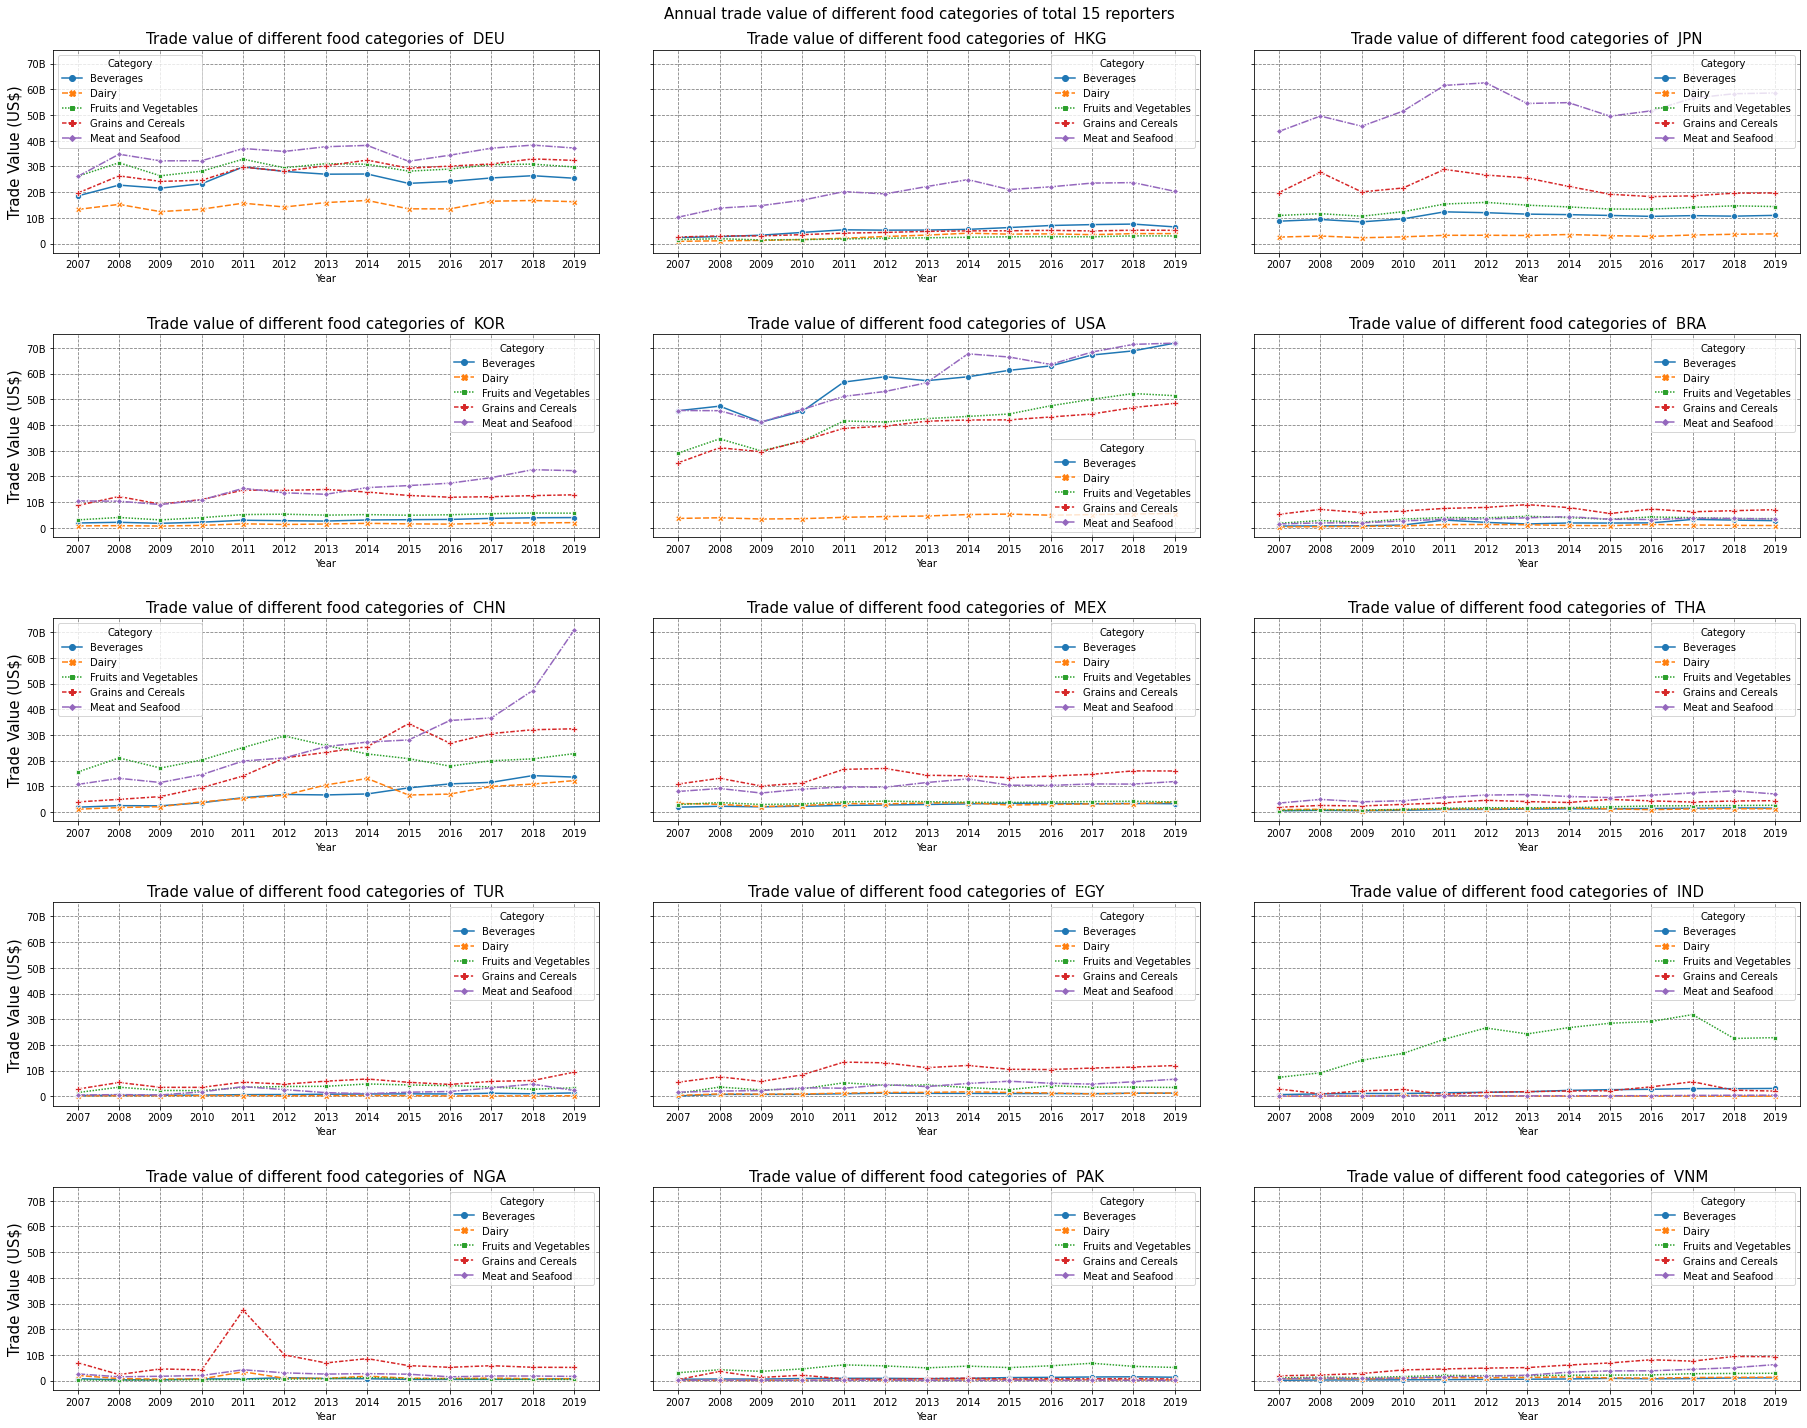

In [7]:
reporter_category_value(data_clean)

In [8]:
def top_partner_category_value(data):

    fig, ax = plt.subplots(2, 3, figsize=(25, 10), sharey=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.2, top=0.9)

    fig.suptitle("Annual trade value of different food categories of 6 top partners", fontsize=15);

    partner_category_value_data = data.groupby(['Year', 'Partner ISO', 'Category']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .reset_index()

    top_partners = partner_category_value_data.groupby(['Partner ISO']) \
        .agg(Total_Value=('Trade_Value', 'sum')) \
        .sort_values(by='Total_Value', ascending=False)[1:7] \
        .index \
        .tolist()

    for count, partner in enumerate(top_partners):
        partner_data = partner_category_value_data.loc[partner_category_value_data['Partner ISO'] == partner]
        sns.lineplot(x=partner_data['Year'], y=partner_data['Trade_Value'], hue='Category', data=partner_data, ax=ax_unpack[count], markers=True, style='Category')
        ax_unpack[count].set_title('Trade value of different food categories of  ' + partner, fontsize=15)
        ax_unpack[count].legend(loc="upper left");
        ax_unpack[count].grid(color='k', linestyle='--');
        ax_unpack[count].yaxis.set_major_formatter(formatter)
        ax_unpack[count].yaxis.set_label_text("Trade Value (US$)", fontsize=15)

Here we choose the top 6 partners according to their total trade value over 20 years, which is USA, CAN, CHN, NLD, FRA, MEX. We can make several conclusions as below:
- USA export mostly "Grains and Cereals" to the other countries before 2015, then the first category was replaced by "Meat and Seafood". CAN's concentration is also on these two kinds of categories
- CHN export mostly the "Meat and Seafood", then is the "Fruit and Vegetables", the hierachy is a bit obvious.
- NLD export every categories evenly, but "Grains and Cereals" shows a largest growth rate.
- For FRA "Beverages" is the most important export food category.
- MEX, CHN, CAN seldom export "Dairy" to the other countries.
- Also we can see all kinds of categories show a sink in the year 2009, and reach a local maxima in the year 2011.

Also an interesting phenomenan here is that all these partners have record before 2007 only in food category "Grain and Cereals", only with the reporter IND, which is very strange, I would say maybe there are some data missed? Let print some information below.


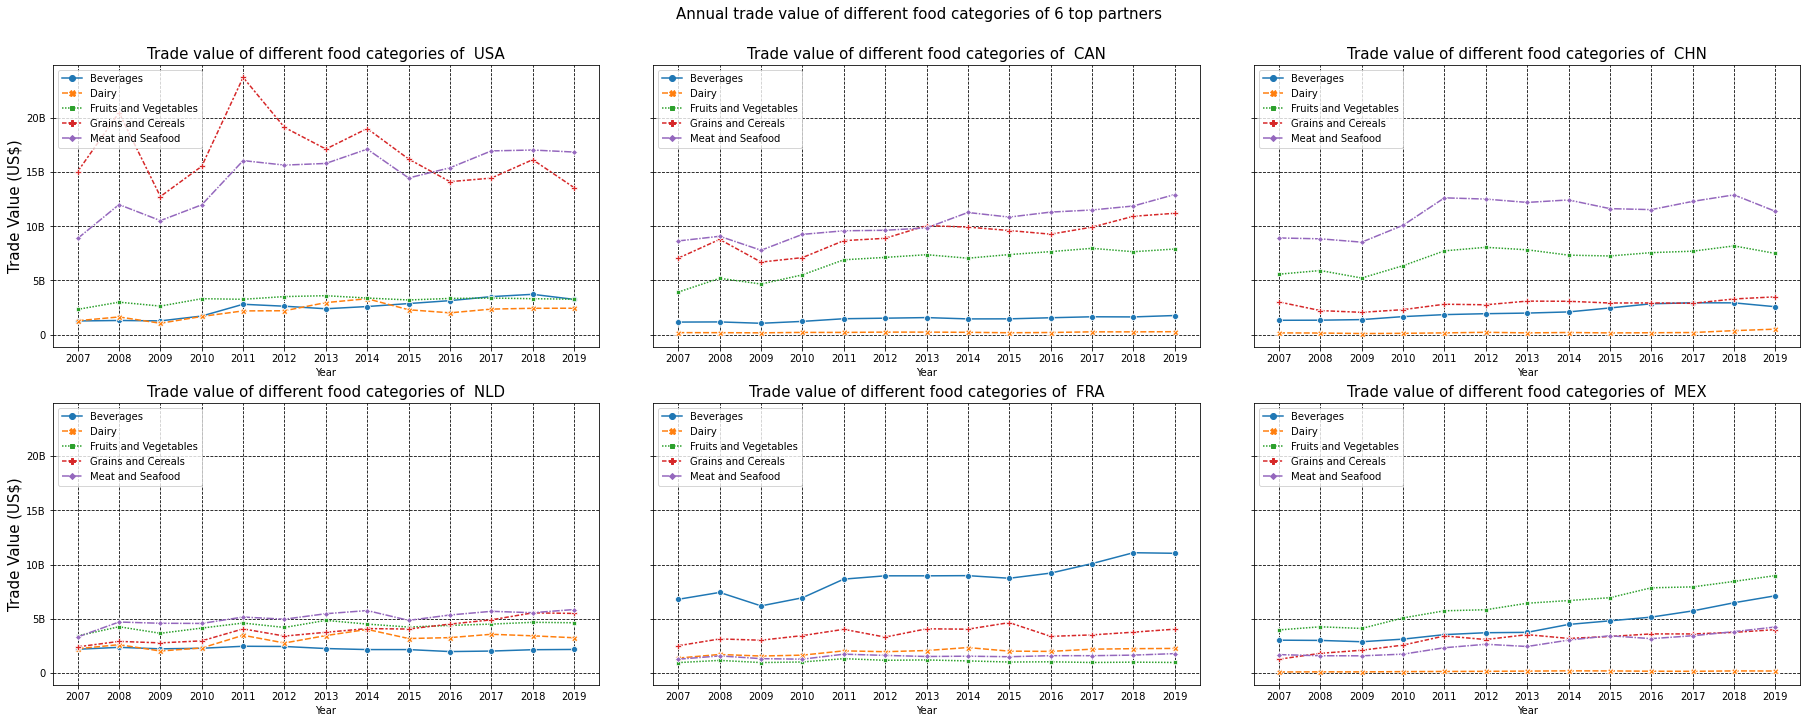

In [9]:
top_partner_category_value(data_clean)

In [10]:
def bottom_partner_category_value(data):

    fig, ax = plt.subplots(2, 3, figsize=(25, 10), sharey=True, sharex=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.2, top=0.9)

    fig.suptitle("Annual trade value of different food categories of 6 bottom partners", fontsize=15);
    
    partner_category_value_data = data.groupby(['Year', 'Partner ISO', 'Category']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .reset_index()

    bottom_partners = partner_category_value_data.groupby(['Partner ISO']) \
        .agg(Total_Value=('Trade_Value', 'sum')) \
        .sort_values(by='Total_Value', ascending=True)[0:6] \
        .index \
        .tolist()

    for count, partner in enumerate(bottom_partners):
        partner_data = partner_category_value_data.loc[partner_category_value_data['Partner ISO'] == partner]
        sns.barplot(x=partner_data['Year'], y=partner_data['Trade_Value'], hue='Category', data=partner_data, ax=ax_unpack[count])
        ax_unpack[count].set_title('Trade value of different food categories of  ' + partner, fontsize=15)
        ax_unpack[count].legend(loc="upper left");
        ax_unpack[count].grid(color='k', linestyle='--');
        ax_unpack[count].yaxis.set_major_formatter(formatter)
        ax_unpack[count].yaxis.set_label_text("Trade Value (US$)", fontsize=15)

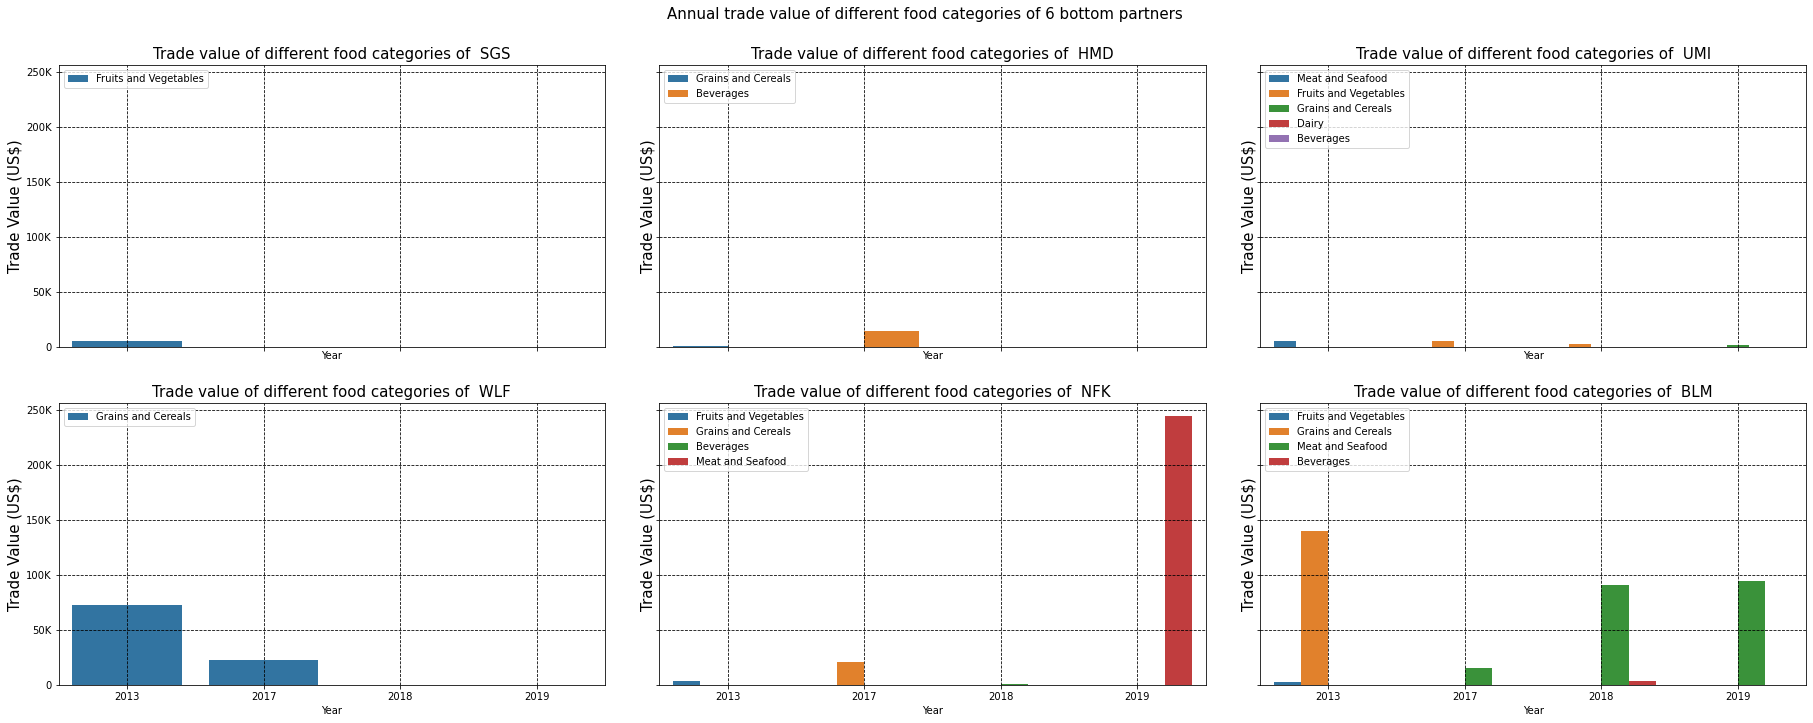

In [11]:
bottom_partner_category_value(data_clean)

In [12]:
reporter_transaction_count = data_clean[{'Year', 'Reporter ISO', 'Category'}] \
    .value_counts() \
    .reset_index() \
    .sort_values(by='Year', ascending=True)
reporter_transaction_count = reporter_transaction_count.rename(columns={0: "Category Count"})
reporter_names = data_clean['Reporter ISO'].unique()

In [13]:
# number of transaction of each kind of food categories for each reporter
def reporter_transaction_num():

    fig, ax = plt.subplots(5, 3, figsize=(25, 20), sharey=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.95)
    fig.suptitle("Number of transactions of 5 kind food categories for each reporter", fontsize=15);

    sns.set(style="darkgrid")

    for count, reporter in enumerate(reporter_names):
        reporter_data = reporter_transaction_count.loc[reporter_transaction_count['Reporter ISO'] == reporter]
        sns.lineplot(x=reporter_data['Year'], y=reporter_data['Category Count'], hue='Category', data=reporter_data, ax=ax_unpack[count], markers=True, style='Category')
        ax_unpack[count].yaxis.set_label_text("Number of transaction", fontsize=15)
        ax_unpack[count].grid(color='k', linestyle='--');
        ax_unpack[count].set_title('Number of transactions for 5 food categories of  ' + reporter, fontsize=15)

- Although the trade value sank in 2009, but the number of transaction were not influenced. Some reporter even import more times from the other countries, like EGY and DEU in year 2009.
- Also, the number of transaction changes not very obvious over the years in large part of reporters, exceptations maybe DEU and IND, whose fluctuations is a bit obvious.
- CHN increase the number of "Dairy" in the year 2008.
- MEX's transaction number in all categories sank since 2014.
- TUR's transaction in 2008, 2009. 2010 of "Dairy" fell down, then returned to normal since 2011.

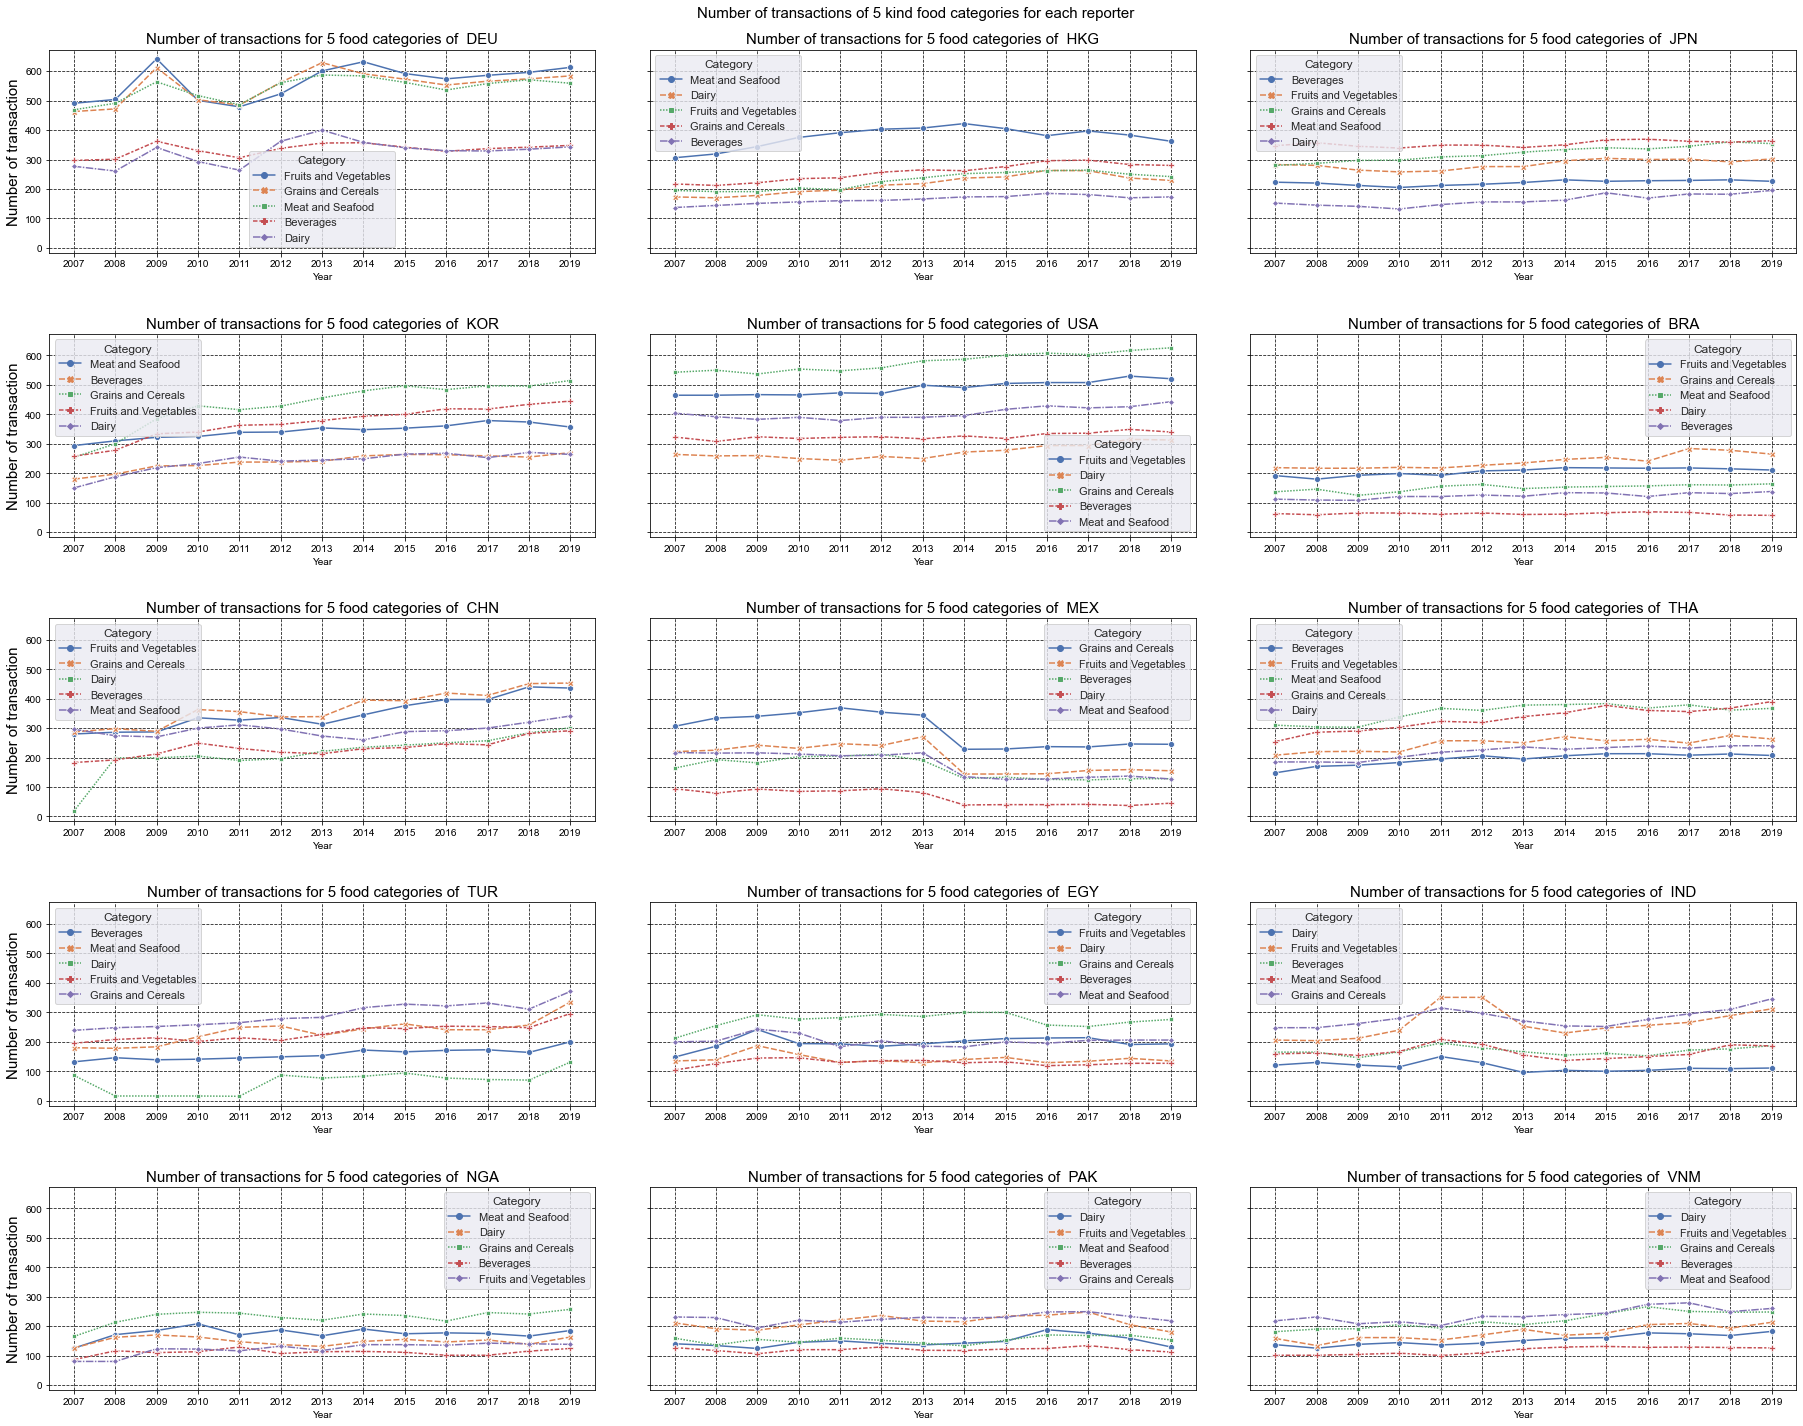

In [14]:
# first deal with the number of transaction of each reporters
reporter_transaction_num()

In [15]:
# define some variables, then give it to the function
partner_transaction_count = data_clean[{'Year', 'Partner ISO', 'Category'}] \
    .value_counts() \
    .reset_index() \
    .sort_values(by='Year', ascending=True)
partner_transaction_count = partner_transaction_count.rename(columns={0: "Category Count"})

# pick the top 6 partner in the number of total transactions over 20 years
partner_top_transaction = partner_transaction_count.groupby(['Partner ISO']).agg(Total_Count=("Category Count", "sum")) \
        .reset_index() \
        .sort_values(by='Total_Count', ascending=False)[1:7]['Partner ISO'] \
        .unique() \
        .tolist()

# pick the bottom 6 partner in the number of total transactions over 20 years
partner_bottom_transaction = partner_transaction_count.groupby(['Partner ISO']).agg(Total_Count=("Category Count", "sum")) \
        .reset_index() \
        .sort_values(by='Total_Count', ascending=True)[0:6]['Partner ISO'] \
        .unique() \
        .tolist()

In [16]:
# number of transaction of each kind of food categories for chosen top partners
def partner_top_transaction_num():

    fig, ax = plt.subplots(2, 3, figsize=(25, 10), sharey=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.9)
    fig.suptitle("Number of transactions of 5 kind food categories for chosen 6 top partners", fontsize=15);
    sns.set(style="darkgrid")
        
    for count, partner in enumerate(partner_top_transaction):
        partner_data = partner_transaction_count.loc[partner_transaction_count['Partner ISO'] == partner]
        sns.lineplot(x=partner_data['Year'], y=partner_data['Category Count'], hue='Category', data=partner_data, ax=ax_unpack[count], markers=True, style='Category')
        ax_unpack[count].yaxis.set_label_text("Number of transaction", fontsize=15)
        ax_unpack[count].set_title('Number of transactions for 5 food categories of  ' + partner, fontsize=15)

Here we choose the top 6 partners according to their total number of transactions over the 20 years, conclusion are made as below:
- The transaction of "Grains and Cereals" is always very stable in each export country, while other categories show a large fluctuation.
- All partners have very low transaction record in the category "Beverages"
- USA, FRA, NLD and GBR export "Meat and Seafood" most frequently, while DEU and ITA export "Fruit and Vegetables" most frequently.

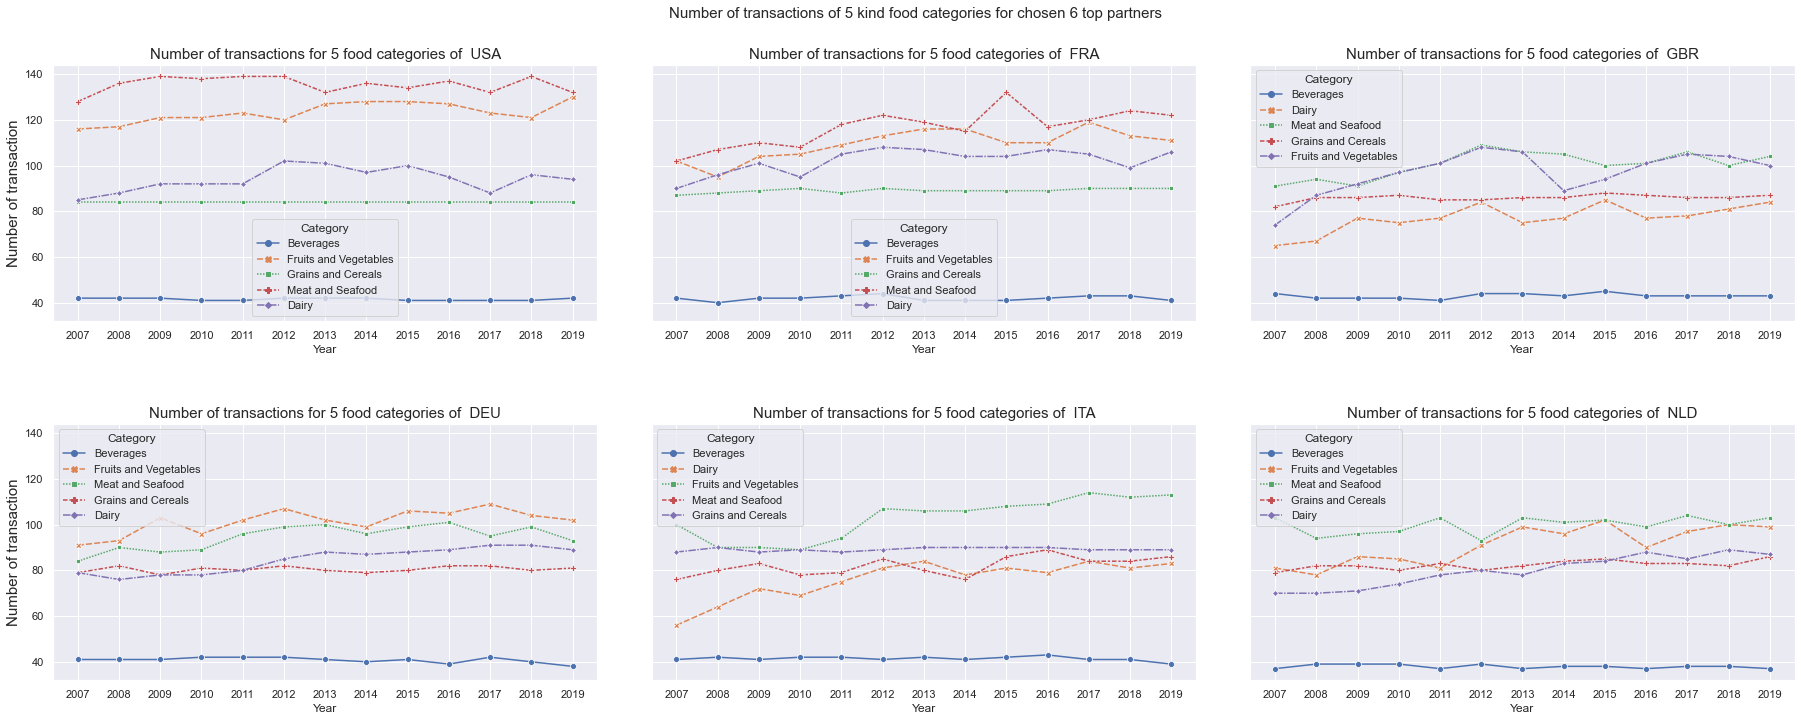

In [17]:
partner_top_transaction_num()

In [18]:
# number of transaction of each kind of food categories for chosen top partners
def partner_bottom_transaction_num():

    fig, ax = plt.subplots(2, 3, figsize=(25, 10), sharey=True, sharex=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.9)
    fig.suptitle("Number of transactions of 5 kind food categories for chosen 6 bottom partners", fontsize=15);

    sns.set(style="darkgrid")
    color_sequence = ['c','m','y','b','g','r']
        
    for count, partner in enumerate(partner_bottom_transaction):
        partner_data = partner_transaction_count.loc[partner_transaction_count['Partner ISO'] == partner]
        sns.barplot(x=partner_data['Year'], y=partner_data['Category Count'], hue='Category', data=partner_data, ax=ax_unpack[count])
        ax_unpack[count].yaxis.set_label_text("Number of transaction", fontsize=15)
        ax_unpack[count].set_title('Number of transactions for 5 food categories of  ' + partner, fontsize=15)

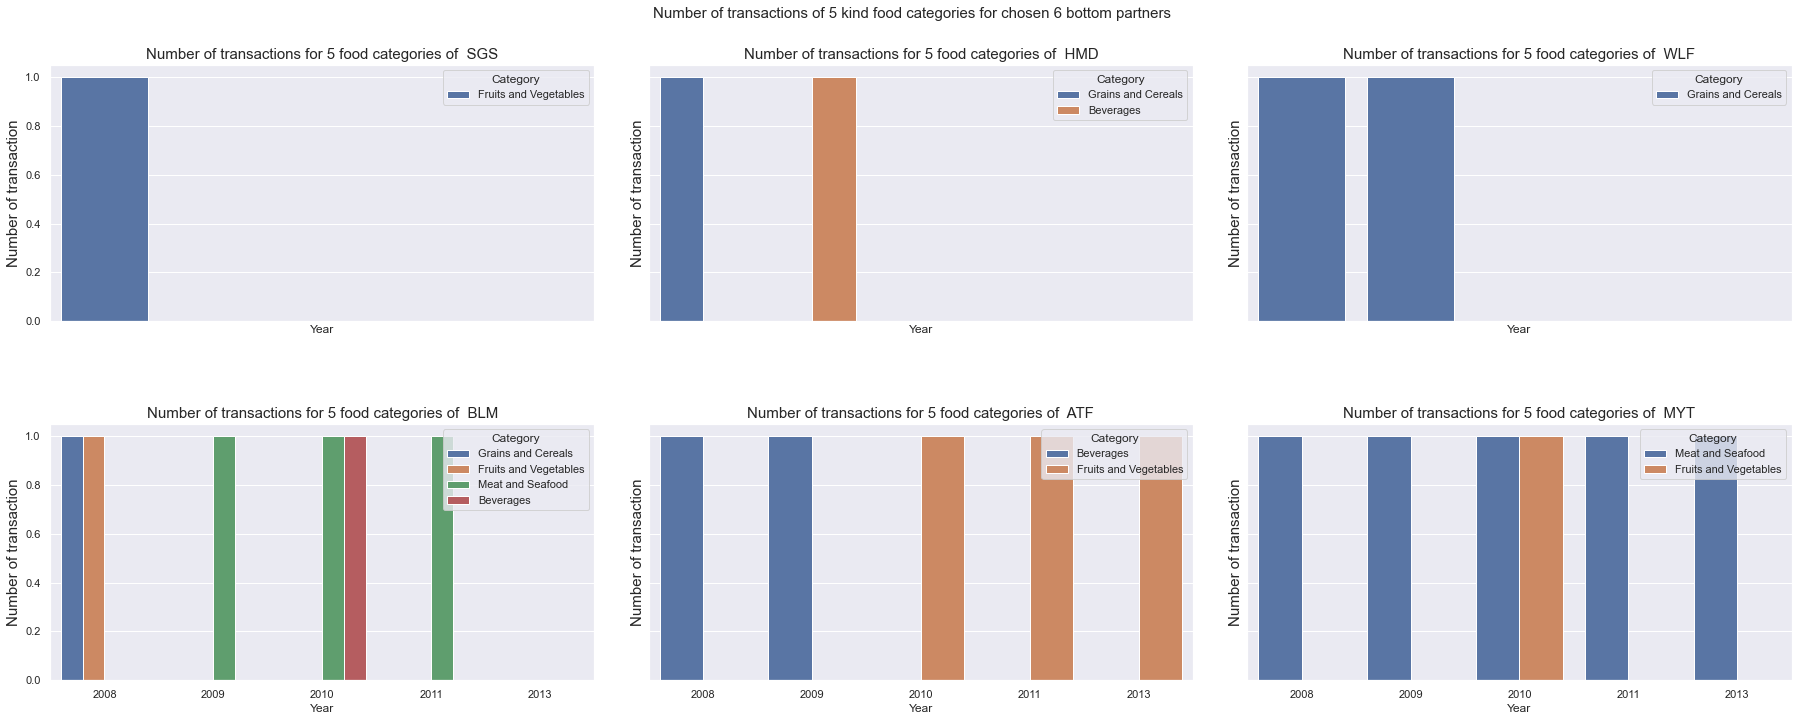

In [19]:
partner_bottom_transaction_num()

### 3.2 Reporter - Partner Relationship
In this part solved problems are list as below:
- Each reporter's trade value (Import), number of transactions with its top 20 partners
- Each reporter's trade value (Import), number of transactions with its bottom 20 partners??? The effect is not very good.

There are three kind of trade flows, first we show the number of each kind of trade flow as below. As shown in Series "country_count", "Import" is the most important one, since the other two happens rarely, hence we only analyze the import data here

In [20]:
country_count = data_clean['Trade Flow'].value_counts()
country_count

Import       241217
Export           40
Re-Import         2
Name: Trade Flow, dtype: int64

In [21]:
# trade value of each reporter with its top partners
def reporter_top_partner_trade_value(input_data):
    # have tried to use the same unit in y-axis here, but the effect is not very good
    fig, ax = plt.subplots(5, 3, figsize=(30, 20), sharey=True)
    # fig, ax = plt.subplots(5, 3, figsize=(30, 20))
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.95)
    
    # choose top 5 partners by total trade values over 20 years
    reporter_partner_year_value = input_data.groupby(['Year', 'Reporter ISO', 'Partner ISO']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .reset_index()

    reporter_partner_order = reporter_partner_year_value \
        .groupby(['Reporter ISO', 'Partner ISO']) \
        .sum() \
        .reset_index() \
        .sort_values(by='Trade_Value', ascending=False)

    sns.set(style="darkgrid")
    reporter_names = input_data['Reporter ISO'].unique()
        
    for count, reporter in enumerate(reporter_names):
        top_partner = reporter_partner_order.loc[reporter_partner_order['Reporter ISO'] == reporter][1:6]['Partner ISO'].unique().tolist()
        
        reporter_top_partner = reporter_partner_year_value \
            .loc[reporter_partner_year_value['Reporter ISO'] == reporter] \
            .loc[reporter_partner_year_value['Partner ISO'].isin(top_partner)]

        sns.lineplot(x=reporter_top_partner['Year'], y=reporter_top_partner['Trade_Value'], hue='Partner ISO', data=reporter_top_partner, markers=True, style='Partner ISO', ax=ax_unpack[count])
        ax_unpack[count].yaxis.set_major_formatter(formatter)
        ax_unpack[count].yaxis.set_label_text("Trade Value (US$)", fontsize=15)
        ax_unpack[count].set_title('Top 5 partners of  ' + reporter, fontsize=15)
    
    fig.suptitle("Annual trade value of top 5 partners for each reporter", fontsize=15);

Here we choose each reporter's top 5 partners according the trade value between two countries over 20 years, then we show the annual trade value over each partner per reporter over 20 years.
- The top 5 partner of DEU are all its neighbourhood, maybe the key factor here is the transportation.
- CAN and MEX are in prior position in the USA's import trade value.
- Same is as USA to MEX.


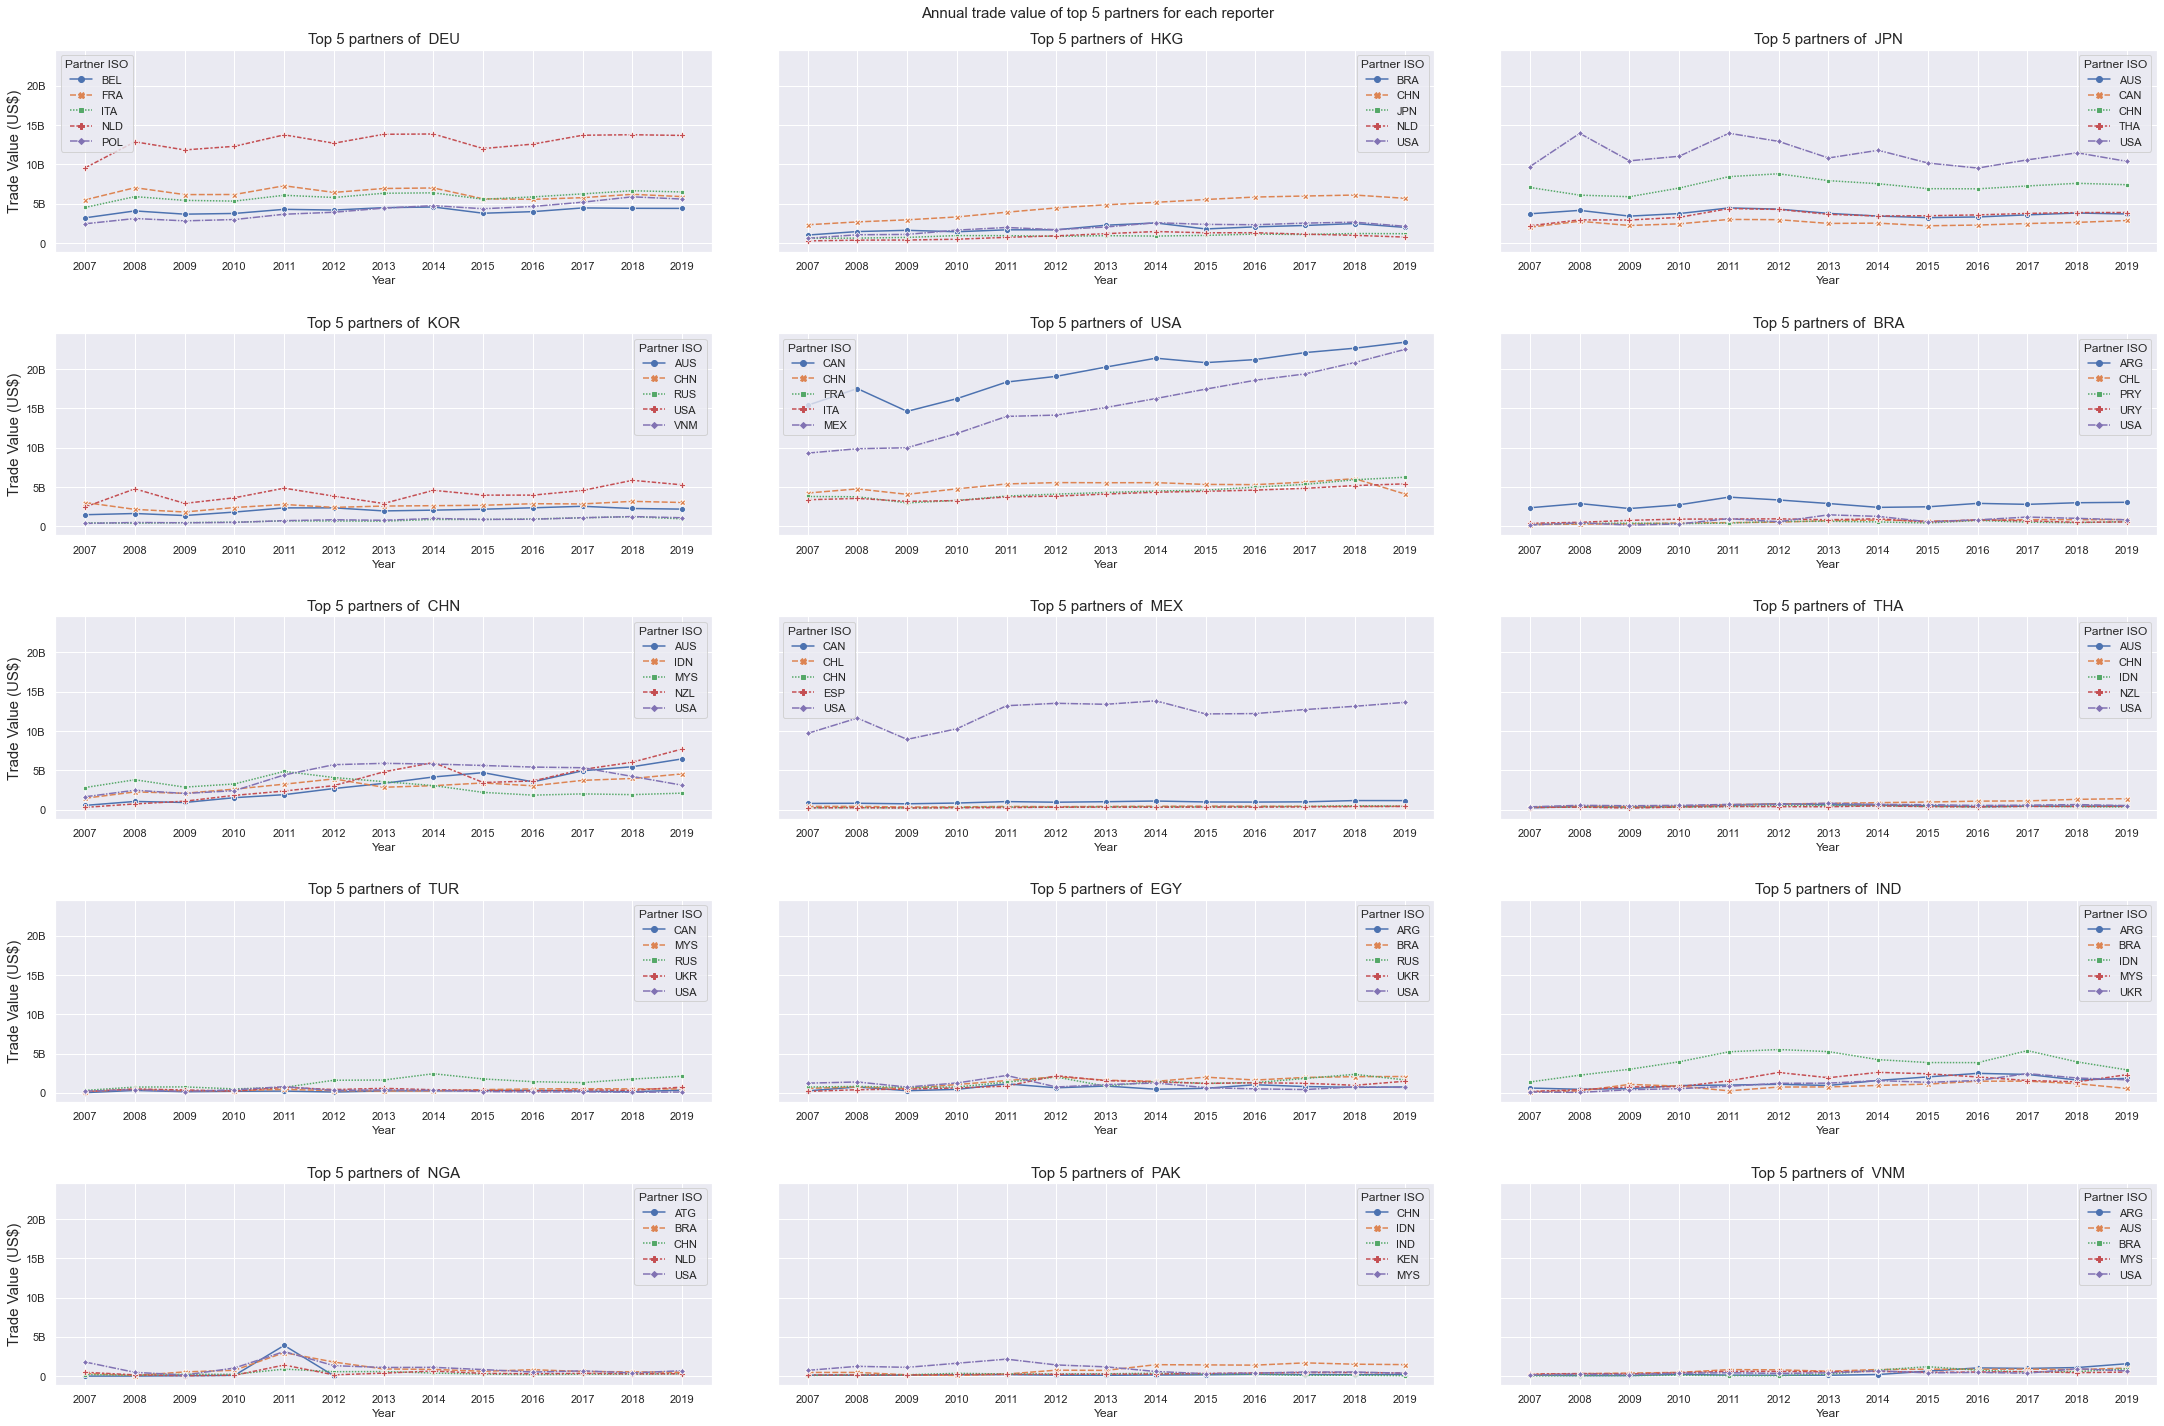

In [22]:
reporter_top_partner_trade_value(data_clean)

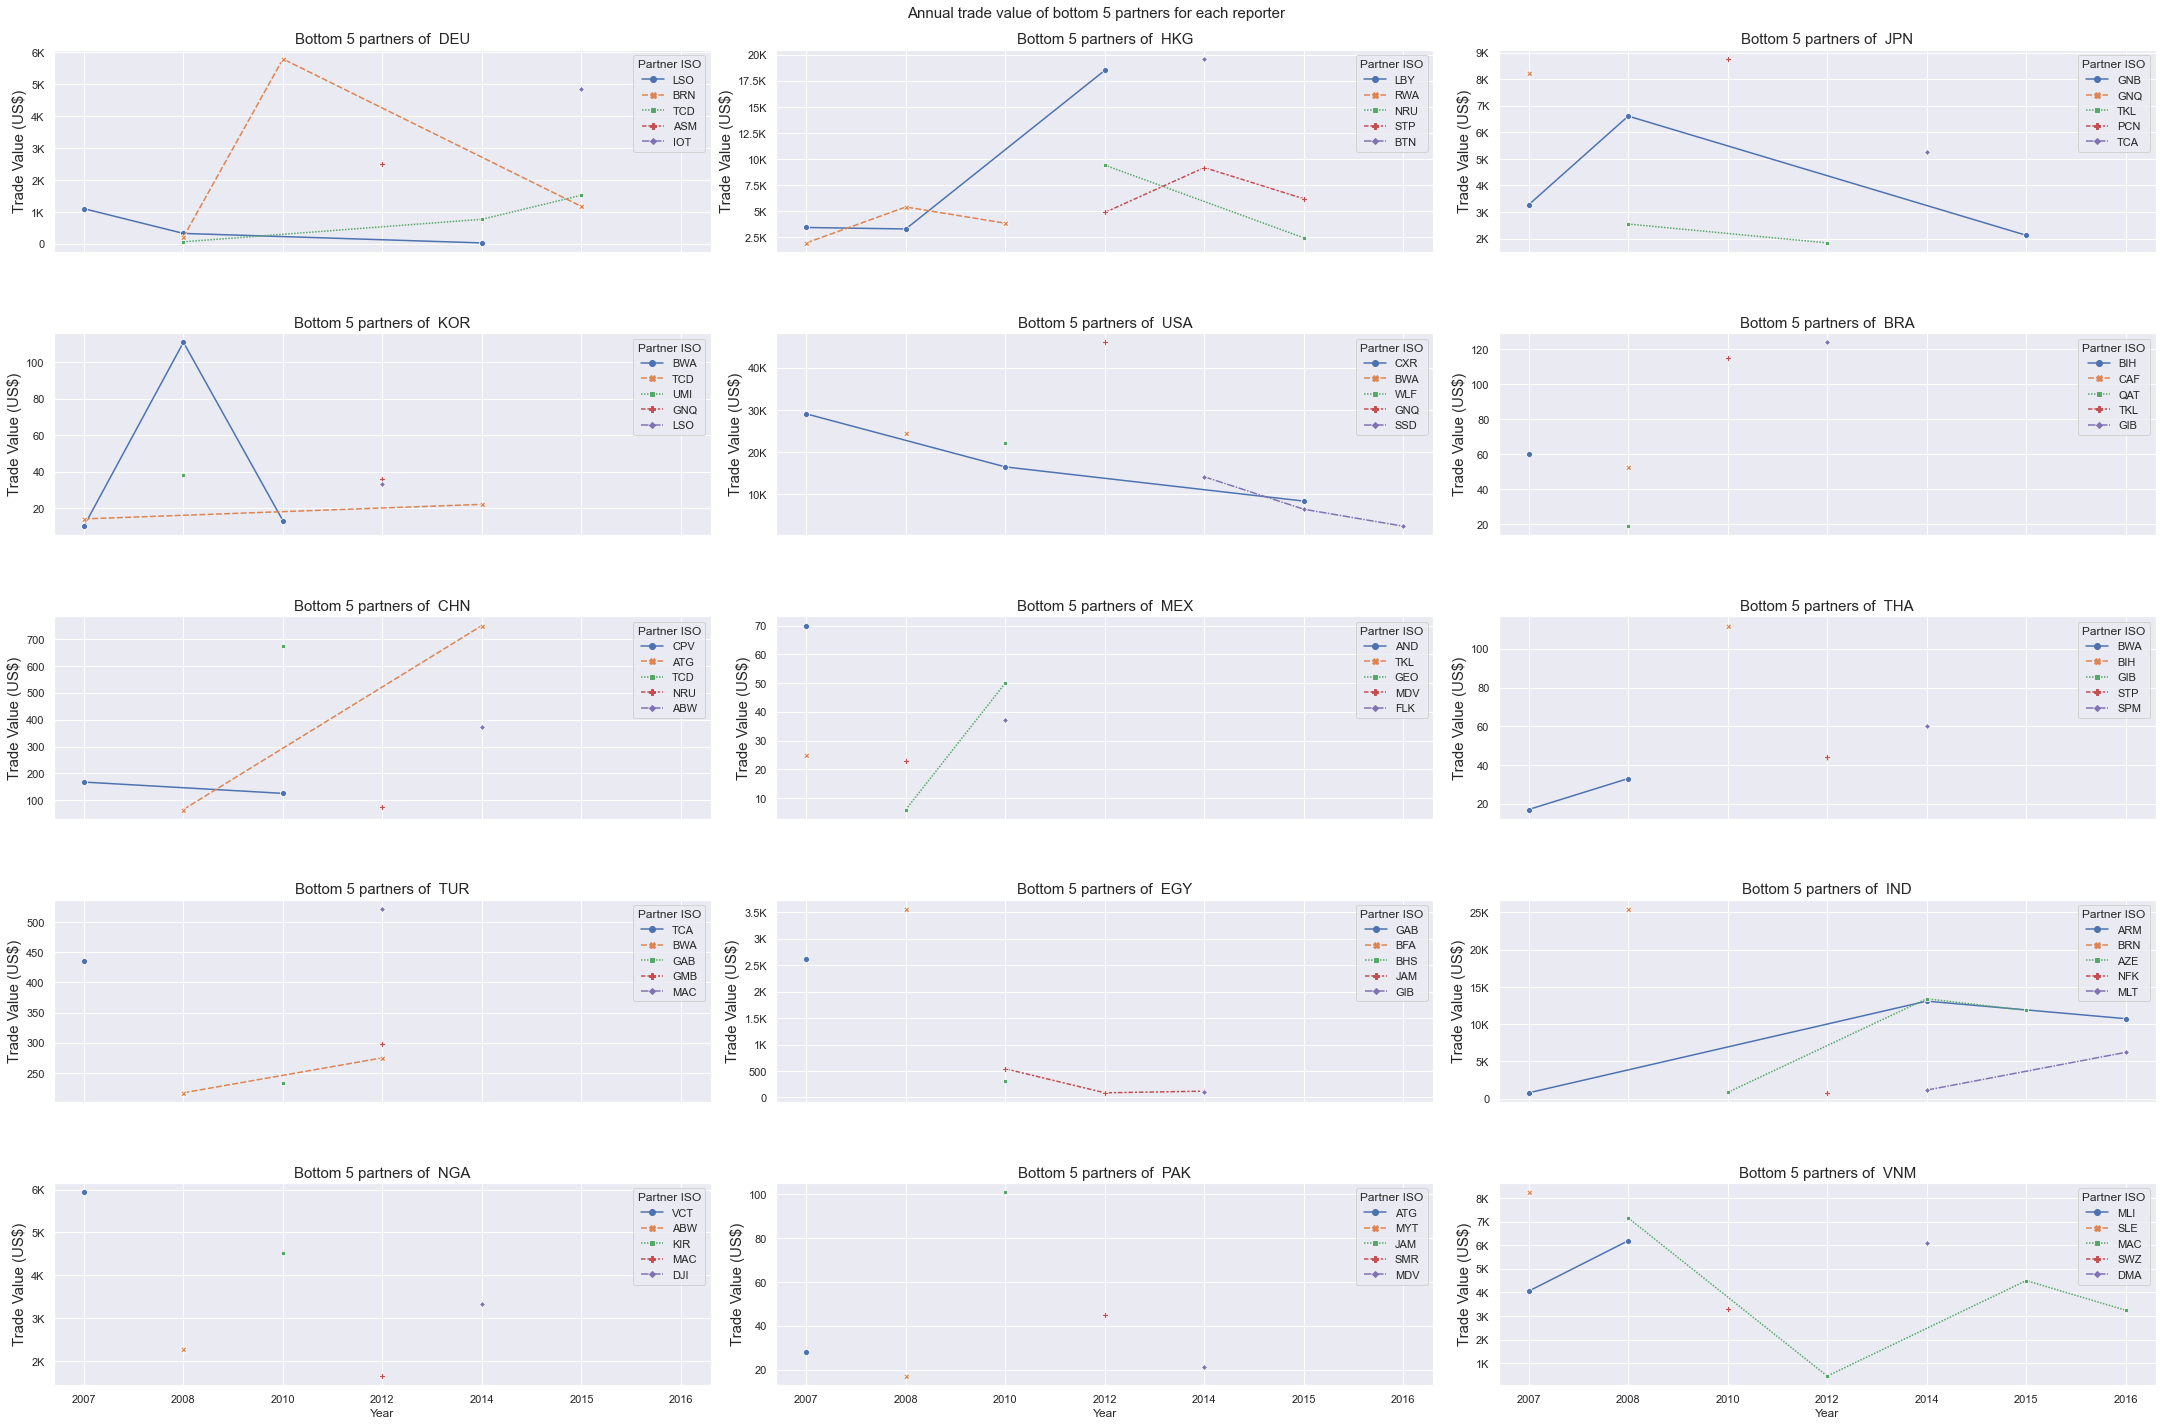

In [23]:
# for the bottom partners the visualization is not very good
# need to think of someway to fix that
# trade value of each reporter with its top partners
def reporter_bottom_partner_trade_value(input_data):
    # have tried to use the same unit in y-axis here, but the effect is not very good
    fig, ax = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
    # fig, ax = plt.subplots(5, 3, figsize=(30, 20))
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.95)
    
    # choose top 5 partners by total trade values over 20 years
    reporter_partner_year_value = input_data.groupby(['Year', 'Reporter ISO', 'Partner ISO']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .reset_index()

    reporter_partner_order = reporter_partner_year_value \
        .groupby(['Reporter ISO', 'Partner ISO']) \
        .sum() \
        .reset_index() \
        .sort_values(by='Trade_Value', ascending=True)

    sns.set(style="darkgrid")
    reporter_names = input_data['Reporter ISO'].unique()
        
    for count, reporter in enumerate(reporter_names):
        top_partner = reporter_partner_order.loc[reporter_partner_order['Reporter ISO'] == reporter][1:6]['Partner ISO'].unique().tolist()
        
        reporter_top_partner = reporter_partner_year_value \
            .loc[reporter_partner_year_value['Reporter ISO'] == reporter] \
            .loc[reporter_partner_year_value['Partner ISO'].isin(top_partner)]

        sns.lineplot(x=reporter_top_partner['Year'], y=reporter_top_partner['Trade_Value'], hue='Partner ISO', data=reporter_top_partner, markers=True, style='Partner ISO', ax=ax_unpack[count])
        ax_unpack[count].yaxis.set_major_formatter(formatter)
        ax_unpack[count].yaxis.set_label_text("Trade Value (US$)", fontsize=15)
        ax_unpack[count].set_title('Bottom 5 partners of  ' + reporter, fontsize=15)
    
    fig.suptitle("Annual trade value of bottom 5 partners for each reporter", fontsize=15);
reporter_bottom_partner_trade_value(data_clean)

According to the result above, we can find that there is an obvious dump in trade values for each reporter in each food categories in the year 2009, while in the year 2011 all reach a local maximul point. Then contact to the reality, it's mainly because that......(tbd)

In [24]:
# number of transaction of each reporter with its top or bottom 20 partners
direction = {'Top': False, 'Bottom': True}
def num_transaction_of_reporter(input_data, order_direction):

    fig, ax = plt.subplots(5, 3, figsize=(30, 20), sharey=True)
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.95)
    
    
    transaction_count = input_data[{'Reporter ISO', 'Partner ISO'}].value_counts(ascending=order_direction) \
        .reset_index() \
        .rename(columns={0: 'Num'})

    sns.set(style="darkgrid")
    reporter_names = input_data['Reporter ISO'].unique()
    color_sequence = ['c','m','y','b','g','r']

    if order_direction:
        title_name = 'Bottom'
    else:
        title_name = "Top"
        
    for count, reporter in enumerate(reporter_names):
        data_to_plot = transaction_count.loc[transaction_count['Reporter ISO'] == reporter][0:20]
        sns.barplot(x=data_to_plot['Partner ISO'], y=data_to_plot['Num'], data=data_to_plot, ax=ax_unpack[count])
        ax_unpack[count].yaxis.set_label_text("Number of transaction", fontsize=15)
        ax_unpack[count].set_title(title_name + '  20 partners of  ' + reporter, fontsize=15)
    
    fig.suptitle("Number of transactions over 20 years with " + title_name + " 20 partners for each reporter", fontsize=15);

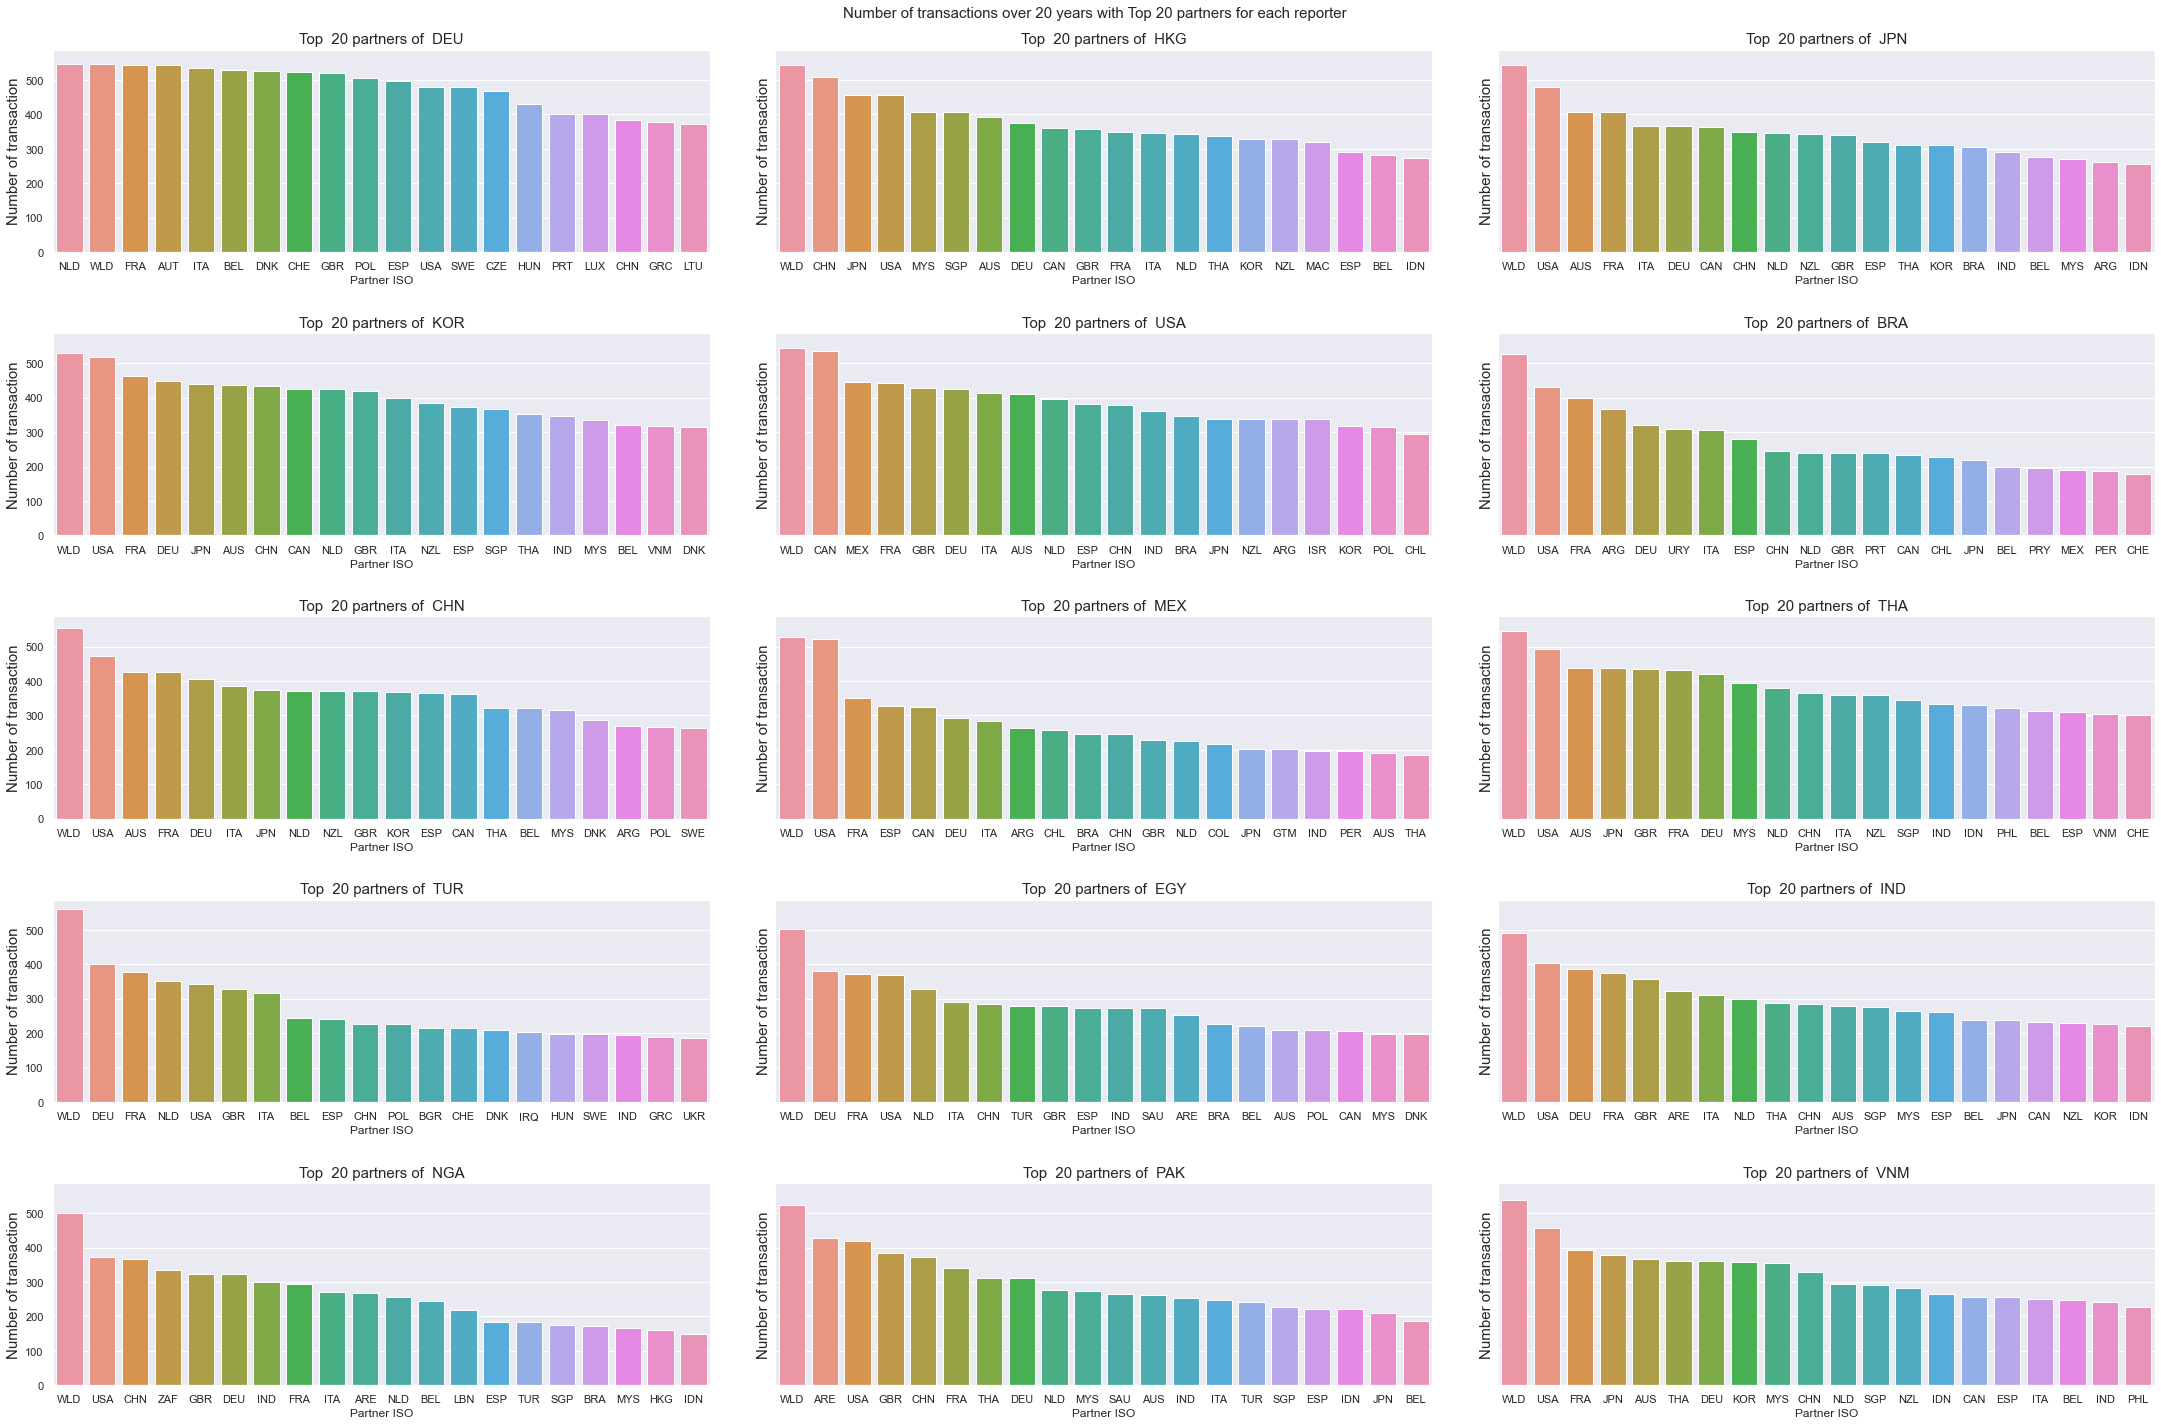

In [25]:
# first visualized here is the top 20 partners of each reporter
num_transaction_of_reporter(data_clean, direction['Top'])

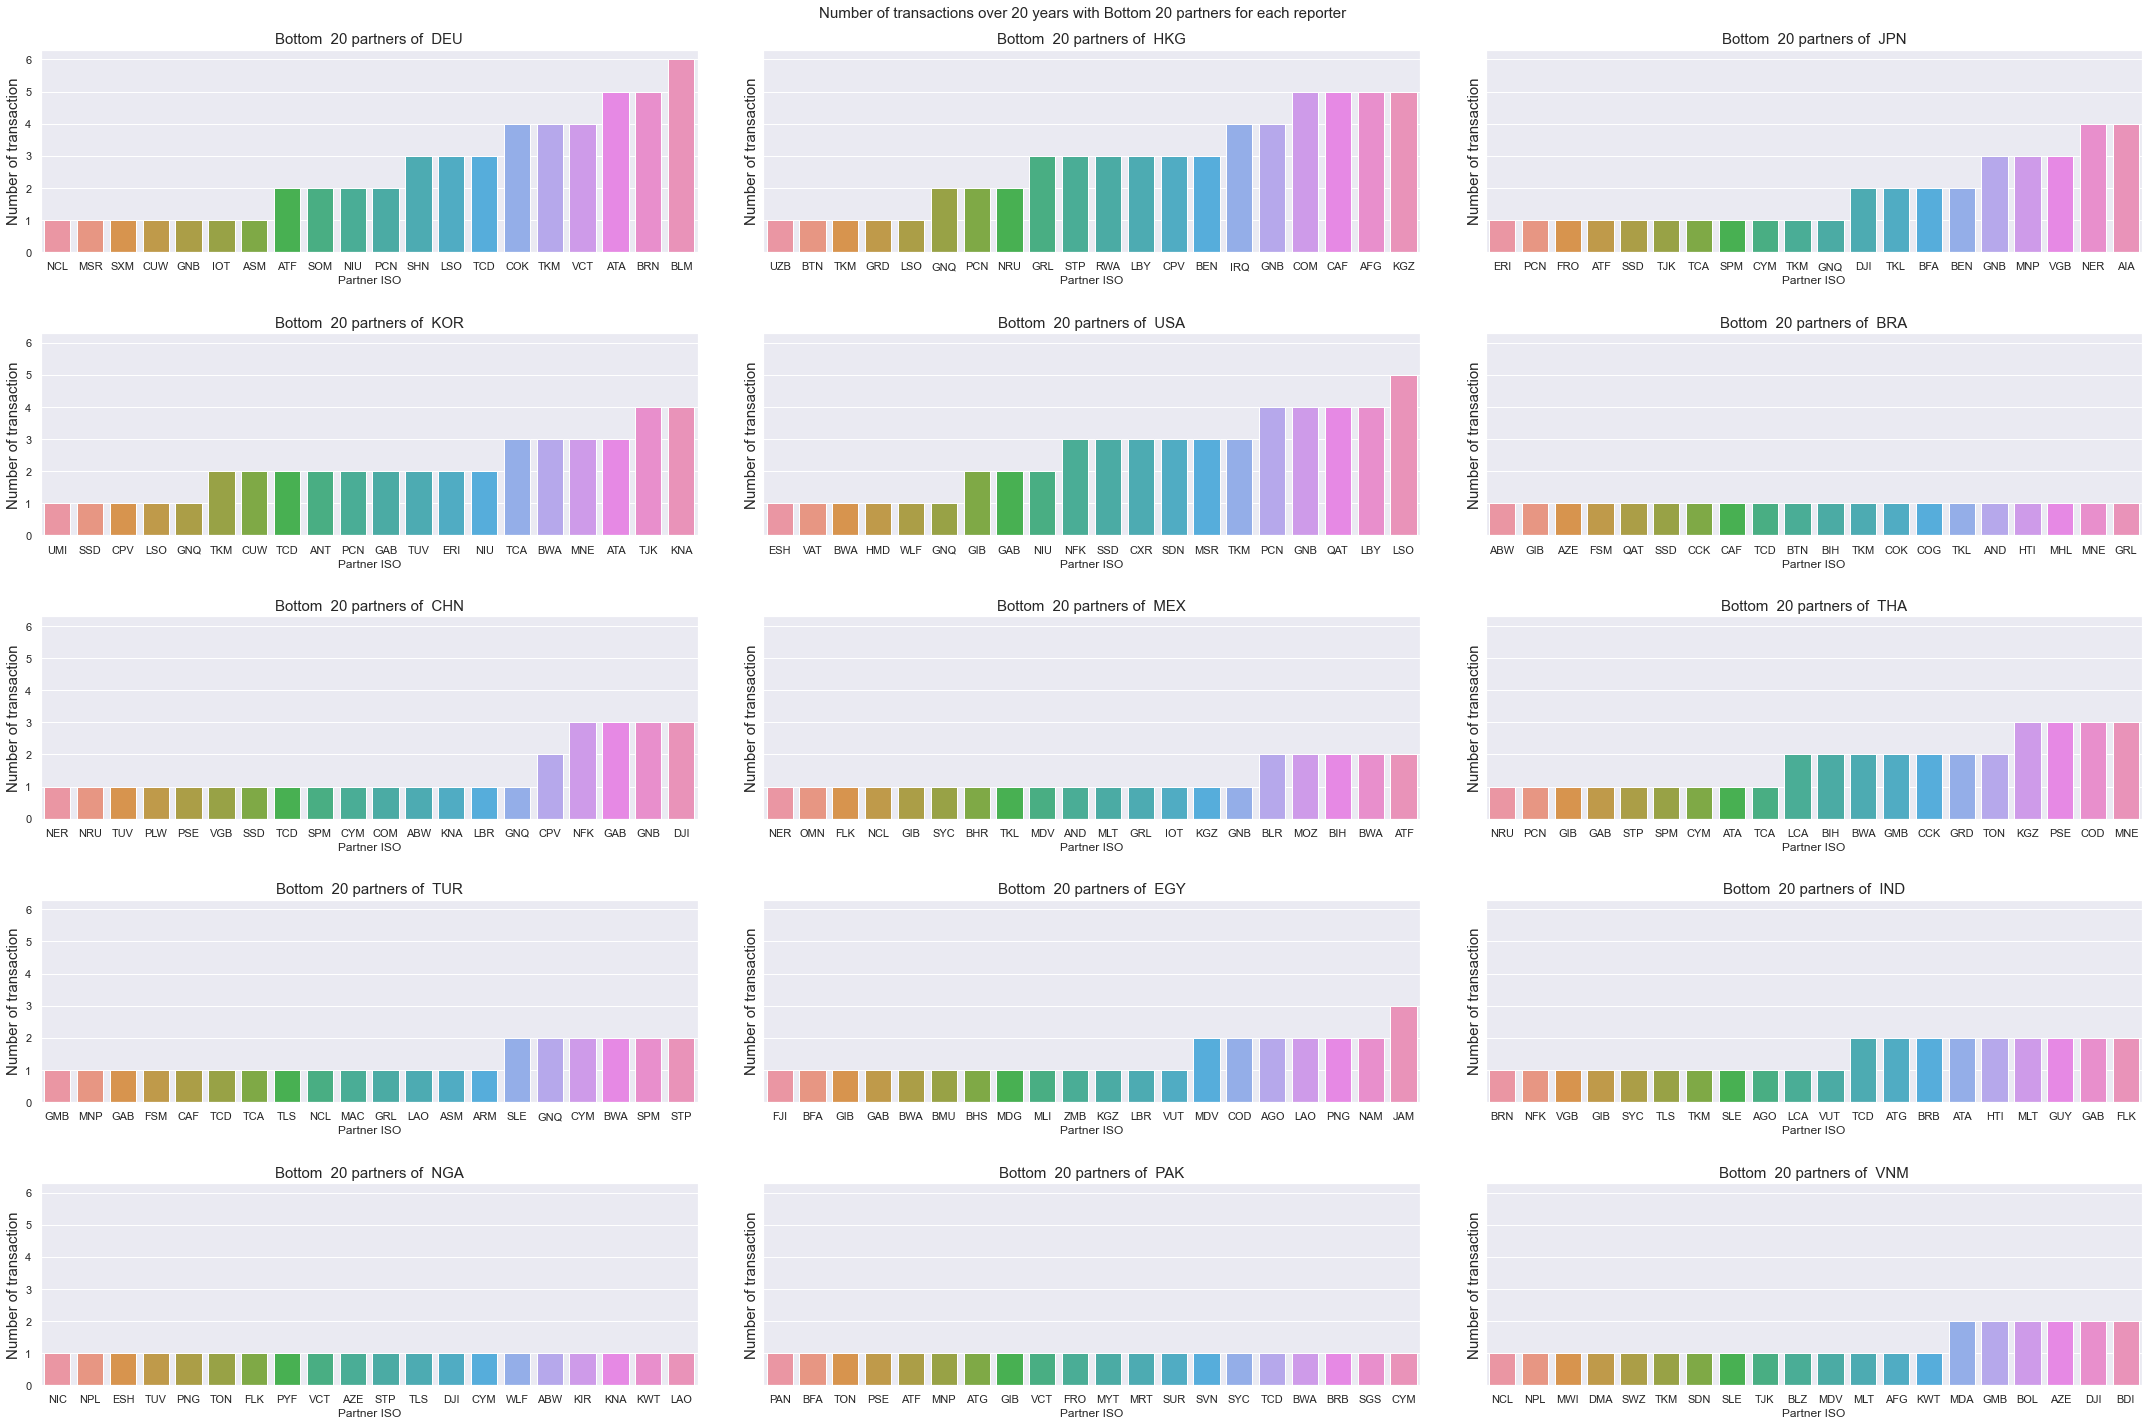

In [26]:
# then is the number of transaction of each reporter with its bottom 20 partners
num_transaction_of_reporter(data_clean, direction['Bottom'])

### 3.3 Details


Now dig into small details of certain reporter


In [27]:
reporter_names = data_clean['Reporter ISO'].unique()

# reporter_partner_year_value = input_data.groupby(['Year', 'Reporter ISO', 'Partner ISO']) \
#     .agg(Trade_Value=("Trade Value (US$)", "sum")) \
#     .reset_index()
order_in_value = data_clean.groupby(['Reporter ISO', 'Partner ISO']) \
    .sum() \
    .reset_index() \
    .sort_values(by='Trade Value (US$)', ascending=False)

order_in_num = data_clean[{'Reporter ISO', 'Partner ISO'}].value_counts(ascending=False) \
    .reset_index()

for count, reporter in enumerate(reporter_names):
    print(f"The first partner of {reporter} is {order_in_value.loc[order_in_value['Reporter ISO'] == reporter][1:2]['Partner ISO'].values} in trade value, and {order_in_num.loc[order_in_num['Reporter ISO'] == reporter][1:2]['Partner ISO'].values} in transaction number")


The first partner of DEU is ['NLD'] in trade value, and ['WLD'] in transaction number
The first partner of HKG is ['CHN'] in trade value, and ['CHN'] in transaction number
The first partner of JPN is ['USA'] in trade value, and ['USA'] in transaction number
The first partner of KOR is ['USA'] in trade value, and ['USA'] in transaction number
The first partner of USA is ['CAN'] in trade value, and ['CAN'] in transaction number
The first partner of BRA is ['ARG'] in trade value, and ['USA'] in transaction number
The first partner of CHN is ['USA'] in trade value, and ['USA'] in transaction number
The first partner of MEX is ['USA'] in trade value, and ['USA'] in transaction number
The first partner of THA is ['CHN'] in trade value, and ['USA'] in transaction number
The first partner of TUR is ['RUS'] in trade value, and ['DEU'] in transaction number
The first partner of EGY is ['BRA'] in trade value, and ['DEU'] in transaction number
The first partner of IND is ['IDN'] in trade value, an

In [28]:
def reporter_partner_detail(input_data, reporter, partner):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax_unpack = ax.ravel()
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.9)

    fig.suptitle("Trade details between " + reporter + " and " + partner, fontsize=15);

    reporter_partner_data = input_data.loc[input_data['Reporter ISO'] == reporter] \
        .loc[input_data['Partner ISO'] == partner]
    
    # trade value of each kind of category over the years
    data_1 = reporter_partner_data.groupby(['Year', 'Category']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .reset_index()

    sns.barplot(x=data_1['Year'], y=data_1['Trade_Value'], data=data_1, hue='Category', ax=ax_unpack[0])
    ax_unpack[0].yaxis.set_major_formatter(formatter)
    ax_unpack[0].yaxis.set_label_text("Trade Value (US$)", fontsize=15)
    ax_unpack[0].set_title('Trade value of each categories over 20 years', fontsize=15)

    # trade proportion of each kind of category
    data_2 = reporter_partner_data.groupby(['Year', 'Category']) \
        .agg(Trade_Value=("Trade Value (US$)", "sum")) \
        .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().fillna(0) \

    data_2.plot(kind="bar", stacked=True, figsize=(20, 5), ax=ax_unpack[1], rot=0)
    ax_unpack[1].get_legend().remove()
    ax_unpack[0].yaxis.set_label_text("Category ratio in trade value", fontsize=15)
    ax_unpack[1].set_title('Trade value ratio of each categories over 20 years', fontsize=15)
    

Complementary: if we don't concentrate on the partner "WLD", then the first partner of "DEU" in transaction number is actually NLD instead of "WLD". So let's first see something between DEU and NLD.

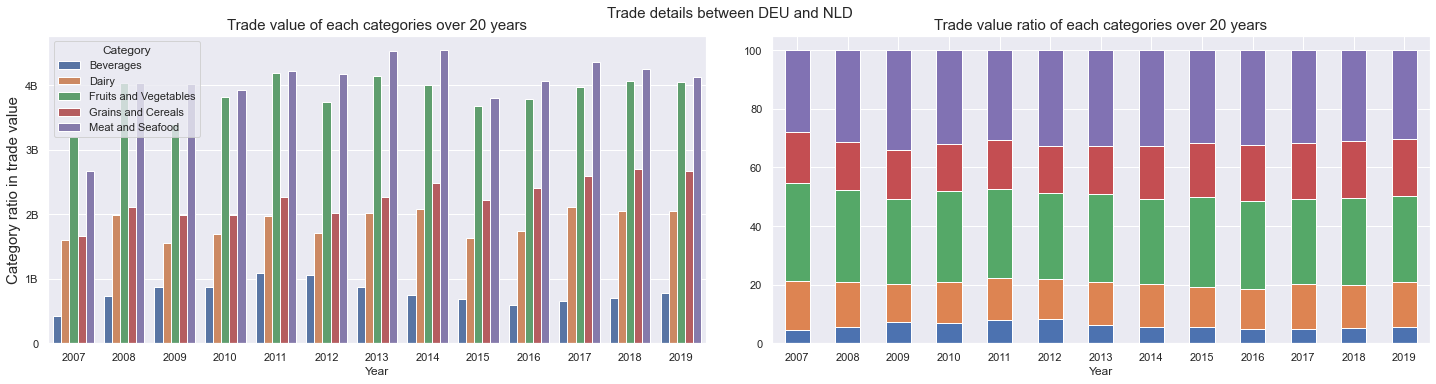

In [29]:
reporter_partner_detail(data_clean, 'DEU', 'NLD')

### 3.4 Corelations
There may be some correlation between different food categories, or other dims